# CIE_4140_Lecture_3_4_Python #

## Integral Fourier Transform and frequency-domain analysis ##

In [2]:
import sympy as sp

In [3]:
tau= sp.symbols('tau',real=True,positive=True)
t = sp.symbols('t',real=True)

Example Function of Time

In [3]:
f = sp.Heaviside(t-tau)-sp.Heaviside(t-2*tau)

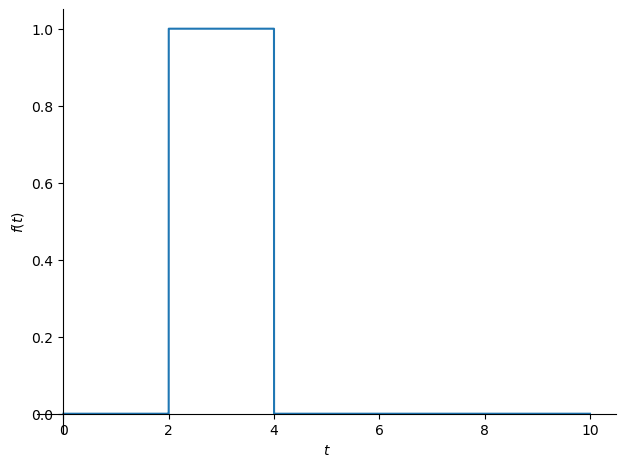

In [4]:
sp.plot(f.subs(tau,2),(t,0,10));

In [5]:
omega = sp.symbols('omega',real=True,positive=True)
phi = sp.symbols('phi',real=True,positive=True)
f_omega = sp.integrate(f*sp.exp(-sp.I*omega*t), (t,-sp.oo,sp.oo))
f_phi = sp.fourier_transform(f,t,phi) 
f_omega = sp.simplify(f_omega)
f_phi = sp.simplify(f_phi)
display(f_omega)
display(f_phi)

I*(1 - exp(I*omega*tau))*exp(-2*I*omega*tau)/omega

I*(1 - exp(2*I*pi*phi*tau))*exp(-4*I*pi*phi*tau)/(2*pi*phi)

Another definition for the fourier transformation is used by sympy

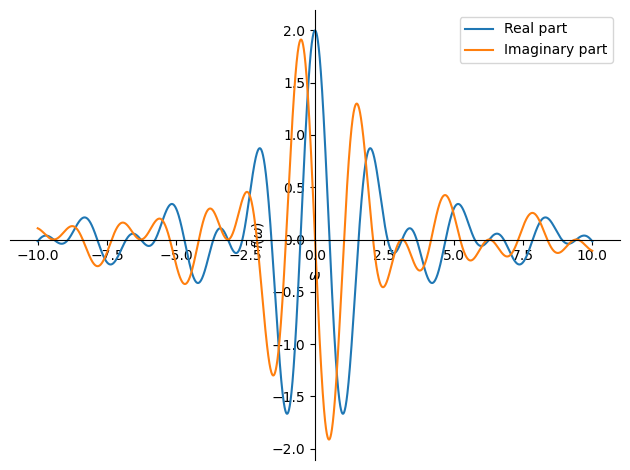

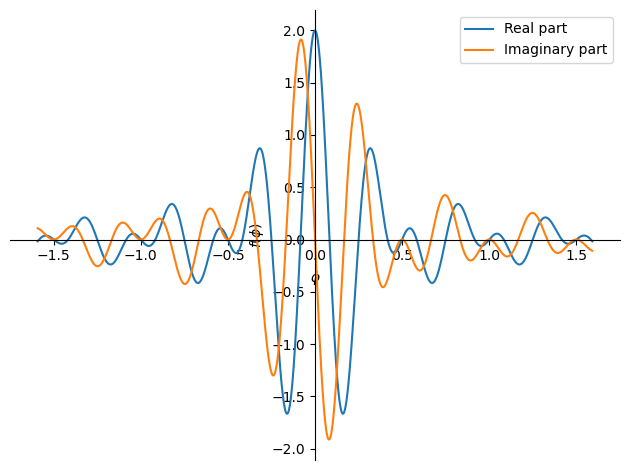

In [6]:
p0 = sp.plotting.plot(sp.re(f_omega.subs([(tau,2)])),(omega,-10,10),label='Real part' ,legend=True,show=False,adaptive=False,nb_of_points=3000)
p1 = sp.plotting.plot(sp.im(f_omega.subs([(tau,2)])),(omega,-10,10),label='Imaginary part',legend=True,show=False,adaptive=False,nb_of_points=3000)
p0.append(p1[0])
p0.show()
p0 = sp.plotting.plot(sp.re(f_phi.subs([(tau,2)])),(phi,-10/2/sp.pi,10/2/sp.pi),label='Real part' ,legend=True,show=False,adaptive=False,nb_of_points=3000)
p1 = sp.plotting.plot(sp.im(f_phi.subs([(tau,2)])),(phi,-10/2/sp.pi,10/2/sp.pi),label='Imaginary part',legend=True,show=False,adaptive=False,nb_of_points=3000)
p0.append(p1[0])
p0.show()

In [7]:
x = sp.symbols('x',cls = sp.Function)
m, c, k = sp.symbols('m, c, k',real=True)#,positive=True)
Equation_of_Motion = m*sp.diff(x(t),t,2)+c*sp.diff(x(t),t)+k*x(t)-f
display(Equation_of_Motion)

c*Derivative(x(t), t) + k*x(t) + m*Derivative(x(t), (t, 2)) + Heaviside(t - 2*tau) - Heaviside(t - tau)

In [8]:
sp.fourier_transform(Equation_of_Motion,t,phi)

TypeError: Invalid comparison of non-real zoo

So inhomogeneous equation of motion cannot be Fourier transformed, homogeneous is possible:

In [9]:
Equation_of_Motion_in_frequency_domain_homogeneous = sp.fourier_transform(m*sp.diff(x(t),t,2)+c*sp.diff(x(t),t)+k*x(t),t,phi)
Equation_of_Motion_in_frequency_domain = Equation_of_Motion_in_frequency_domain_homogeneous - f_phi
display(Equation_of_Motion_in_frequency_domain)

c*FourierTransform(Derivative(x(t), t), t, phi) + k*FourierTransform(x(t), t, phi) + m*FourierTransform(Derivative(x(t), (t, 2)), t, phi) - I*(1 - exp(2*I*pi*phi*tau))*exp(-4*I*pi*phi*tau)/(2*pi*phi)

Derivatives of ${d \over {dt}}x\left( t \right)$ not evaluated

In [10]:
Equation_of_Motion_in_frequency_domain = Equation_of_Motion_in_frequency_domain.subs(sp.fourier_transform(x(t).diff(t),t,phi),sp.I*2*sp.pi*phi*sp.fourier_transform(x(t),t,phi))
Equation_of_Motion_in_frequency_domain = Equation_of_Motion_in_frequency_domain.subs(sp.fourier_transform(x(t).diff(t,2),t,phi),(sp.I*2*sp.pi*phi)**2*sp.fourier_transform(x(t),t,phi))
display(Equation_of_Motion_in_frequency_domain)

2*I*pi*c*phi*FourierTransform(x(t), t, phi) + k*FourierTransform(x(t), t, phi) - 4*pi**2*m*phi**2*FourierTransform(x(t), t, phi) - I*(1 - exp(2*I*pi*phi*tau))*exp(-4*I*pi*phi*tau)/(2*pi*phi)

In [11]:
solution_in_frequency_domain = sp.solve(sp.Eq(Equation_of_Motion_in_frequency_domain,0),sp.FourierTransform(x(t), t, phi))[0]
display(solution_in_frequency_domain)

I*(1 - exp(2*I*pi*phi*tau))*exp(-4*I*pi*phi*tau)/(2*pi*phi*(2*I*pi*c*phi + k - 4*pi**2*m*phi**2))

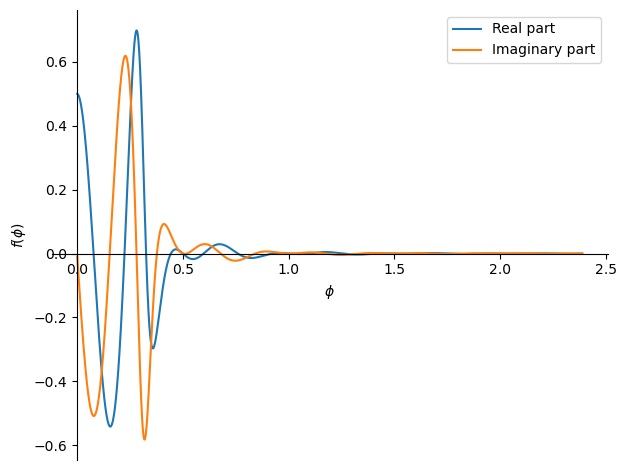

In [12]:
p0 = sp.plotting.plot(sp.re(solution_in_frequency_domain.subs([(tau,2),(k,4),(m,1),(c,0.75)])),(phi,0.001,15/2/sp.pi),label='Real part' ,legend=True,show=False,adaptive=False,nb_of_points=3000)
p1 = sp.plotting.plot(sp.im(solution_in_frequency_domain.subs([(tau,2),(k,4),(m,1),(c,0.75)])),(phi,0.001,15/2/sp.pi),label='Imaginary part',legend=True,show=False,adaptive=False,nb_of_points=3000)
p0.append(p1[0])
p0.show()

In [13]:
solution = sp.inverse_fourier_transform(solution_in_frequency_domain, phi,t)
display(solution)

I*(-InverseFourierTransform(1/(4*I*pi**2*c*phi**2*exp(2*I*pi*phi*tau) + 2*pi*k*phi*exp(2*I*pi*phi*tau) - 8*pi**3*m*phi**3*exp(2*I*pi*phi*tau)), phi, t) + InverseFourierTransform(1/(4*I*pi**2*c*phi**2*exp(4*I*pi*phi*tau) + 2*pi*k*phi*exp(4*I*pi*phi*tau) - 8*pi**3*m*phi**3*exp(4*I*pi*phi*tau)), phi, t))

Above cell takes a long time, but is not fully solved.

In [14]:
solution.subs([(tau,2),(k,4),(m,1),(c,3/4),(t,2)]).evalf()

I*(-InverseFourierTransform(1/(-8*pi**3*phi**3*exp(4*I*pi*phi) + 3.0*I*pi**2*phi**2*exp(4*I*pi*phi) + 8*pi*phi*exp(4*I*pi*phi)), phi, 2) + InverseFourierTransform(1/(-8*pi**3*phi**3*exp(8*I*pi*phi) + 3.0*I*pi**2*phi**2*exp(8*I*pi*phi) + 8*pi*phi*exp(8*I*pi*phi)), phi, 2))

Function cannot be evaluated

Manual fourier transform is tried:

In [15]:
solution_1 = 2 * sp.integrate(sp.re(solution_in_frequency_domain*sp.exp(sp.I*2*sp.pi*phi*t)),(phi,0,sp.oo))
display(solution_1)

(Integral(-im(exp(2*I*pi*phi*t)/(2*I*pi*c*phi*exp(4*I*pi*phi*tau) + k*exp(4*I*pi*phi*tau) - 4*pi**2*m*phi**2*exp(4*I*pi*phi*tau)))/phi, (phi, 0, oo)) + Integral(sin(2*pi*phi*tau)*re(exp(2*I*pi*phi*t)/(2*I*pi*c*phi*exp(4*I*pi*phi*tau) + k*exp(4*I*pi*phi*tau) - 4*pi**2*m*phi**2*exp(4*I*pi*phi*tau)))/phi, (phi, 0, oo)) + Integral(cos(2*pi*phi*tau)*im(exp(2*I*pi*phi*t)/(2*I*pi*c*phi*exp(4*I*pi*phi*tau) + k*exp(4*I*pi*phi*tau) - 4*pi**2*m*phi**2*exp(4*I*pi*phi*tau)))/phi, (phi, 0, oo)))/pi

In [17]:
solution_1.subs([(tau,2),(k,4),(m,1),(c,3/4),(t,4)]).evalf()

0.34930

Numerical evaluation seems possible, but takes too long. In Maple this takes quite a long time to solve as well.

In [18]:
solution_func = sp.lambdify(t,solution_1.subs([(tau,2),(k,4),(m,1),(c,3/4)]))
display(solution_func(4))

<lambdifygenerated-1>:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return (quad(lambda phi: -imag(exp(2*1j*pi*phi*t)/(-4*pi**2*phi**2*exp(8*1j*pi*phi) + 1.5*1j*pi*phi*exp(8*1j*pi*phi) + 4*exp(8*1j*pi*phi)))/phi, 0, PINF)[0] + quad(lambda phi: sin(4*pi*phi)*real(exp(2*1j*pi*phi*t)/(-4*pi**2*phi**2*exp(8*1j*pi*phi) + 1.5*1j*pi*phi*exp(8*1j*pi*phi) + 4*exp(8*1j*pi*phi)))/phi, 0, PINF)[0] + quad(lambda phi: cos(4*pi*phi)*imag(exp(2*1j*pi*phi*t)/(-4*pi**2*phi**2*exp(8*1j*pi*phi) + 1.5*1j*pi*phi*exp(8*1j*pi*phi) + 4*exp(8*1j*pi*phi)))/phi, 0, PINF)[0])/pi


0.3493028443000069

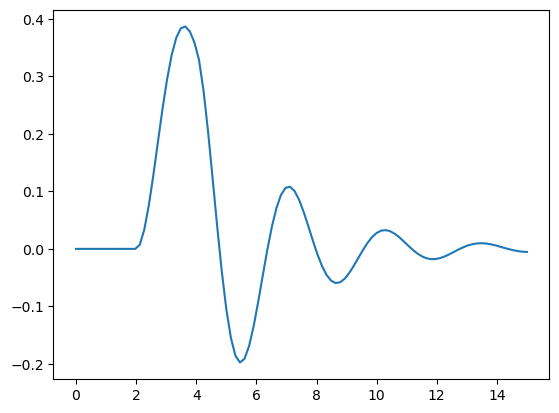

In [21]:
import numpy as np
import matplotlib.pylab as plt
func_values = []
t_list = np.linspace(0,15,100)
for t_i in t_list:
    func_values.append(solution_func(t_i))
plt.plot(t_list,func_values);

Another try with an upper limit of 10 instead of inifity allows evaluating of the function.

In [25]:
solution_2 = 2 * sp.integrate(sp.re(solution_in_frequency_domain*sp.exp(sp.I*2*sp.pi*phi*t)),(phi,0,1.5))
display(solution_2)

(Integral(-im(exp(2*I*pi*phi*t)/(2*I*pi*c*phi*exp(4*I*pi*phi*tau) + k*exp(4*I*pi*phi*tau) - 4*pi**2*m*phi**2*exp(4*I*pi*phi*tau)))/phi, (phi, 0, 1.5)) + Integral(sin(2*pi*phi*tau)*re(exp(2*I*pi*phi*t)/(2*I*pi*c*phi*exp(4*I*pi*phi*tau) + k*exp(4*I*pi*phi*tau) - 4*pi**2*m*phi**2*exp(4*I*pi*phi*tau)))/phi, (phi, 0, 1.5)) + Integral(cos(2*pi*phi*tau)*im(exp(2*I*pi*phi*t)/(2*I*pi*c*phi*exp(4*I*pi*phi*tau) + k*exp(4*I*pi*phi*tau) - 4*pi**2*m*phi**2*exp(4*I*pi*phi*tau)))/phi, (phi, 0, 1.5)))/pi

In [26]:
solution_2.subs([(tau,2),(k,4),(m,1),(c,3/4),(t,4)]).evalf()

0.349397566986233

KeyboardInterrupt: 

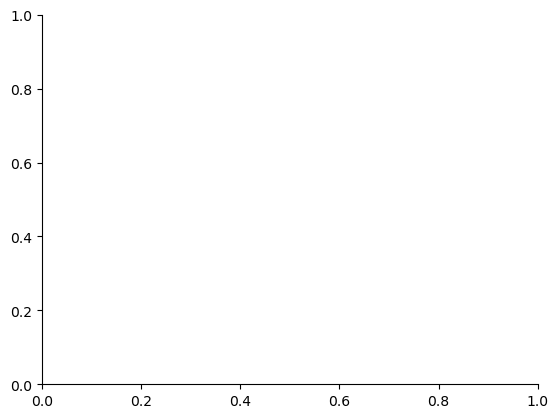

In [27]:
sp.plot(solution_2.subs([(tau,2),(k,4),(m,1),(c,3/4)]),(t,0,15));

Evaluation of all terms to solve for the plot still takes too long. In Maple this takes quite a long time to solve as well.

Converting the equation to a numpy function speeds up the process

In [28]:
solution_in_frequency_domain_numeric = solution_in_frequency_domain.subs([(tau,2),(k,4),(m,1),(c,3/4)])
display(solution_in_frequency_domain_numeric)

I*(1 - exp(4*I*pi*phi))*exp(-8*I*pi*phi)/(2*pi*phi*(-4*pi**2*phi**2 + 1.5*I*pi*phi + 4))

In [29]:
solution_numeric = 2 * sp.integrate(sp.re(solution_in_frequency_domain_numeric*sp.exp(sp.I*2*sp.pi*phi*t)),(phi,0,10))
display(solution_numeric)

(Integral(-im(exp(2*I*pi*phi*t)/(-4*pi**2*phi**2*exp(8*I*pi*phi) + 1.5*I*pi*phi*exp(8*I*pi*phi) + 4*exp(8*I*pi*phi)))/phi, (phi, 0, 10)) + Integral(sin(4*pi*phi)*re(exp(2*I*pi*phi*t)/(-4*pi**2*phi**2*exp(8*I*pi*phi) + 1.5*I*pi*phi*exp(8*I*pi*phi) + 4*exp(8*I*pi*phi)))/phi, (phi, 0, 10)) + Integral(cos(4*pi*phi)*im(exp(2*I*pi*phi*t)/(-4*pi**2*phi**2*exp(8*I*pi*phi) + 1.5*I*pi*phi*exp(8*I*pi*phi) + 4*exp(8*I*pi*phi)))/phi, (phi, 0, 10)))/pi

Analytical solution can be found using the residue theorem: https://groups.google.com/g/sympy/c/ZxgErmBe3qU.
$$\eqalign{
  & \omega  = {{\sqrt {247} } \over 8} + {3 \over 8}i  \cr 
  & \Delta \omega  = {{\sqrt {247} } \over 4}  \cr 
  & \theta  = \arctan \left( {{{{\mathop{\rm Im}\nolimits} \left( \omega  \right)} \over {{\mathop{\rm Re}\nolimits} \left( \omega  \right)}}} \right)  \cr 
  & P\left( \tau  \right) = {{{e^{ - {\mathop{\rm Im}\nolimits} \left( \omega  \right)\tau }}} \over {\left| \omega  \right|}}\cos \left( {{\mathop{\rm Re}\nolimits} \left( \omega  \right)\tau  - \theta } \right)  \cr 
  & F\left( t \right) = {{ - 2} \over {\Delta \omega }}\left\{ {\matrix{
   0 & {t < 2}  \cr 
   {P\left( {t - 2} \right) - P\left( 0 \right)} & {2 \le t \le 4}  \cr 
   {P\left( {t - 2} \right) - P\left( {t - 4} \right)} & {t > 4}  \cr } } \right. \cr} $$


In [59]:
w_r = sp.sqrt(247)/8
w_i = 3/8
w_abs = sp.sqrt(w_r**2+w_i**2)
w_delta = sp.sqrt(247)/4
theta = sp.atan(w_i/w_r)
integral = sp.exp(-w_i*tau)/w_abs*(sp.cos(w_r*tau-theta))
solution_numeric_1 = -2/ w_delta * (integral.subs(tau,t-2)-integral.subs(tau,0))
solution_numeric_2 = -2/ w_delta * (integral.subs(tau,t-2)-integral.subs(tau,t-4))

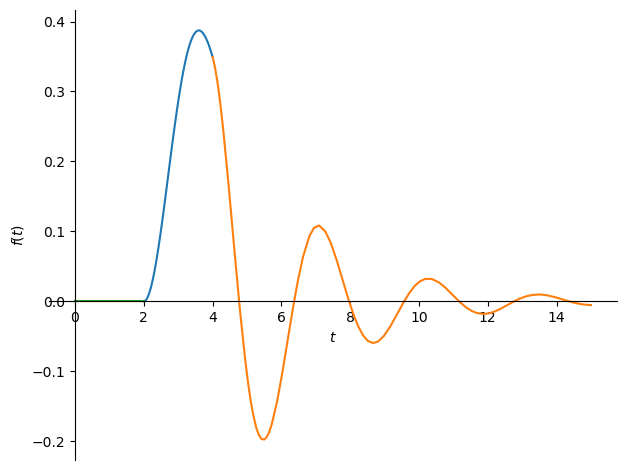

In [60]:
p0 = sp.plotting.plot(solution_numeric_1, (t , 2 , 4),show=False)
p1 = sp.plotting.plot(solution_numeric_2, (t , 4 , 15),show=False)
p2 = sp.plotting.plot(0, (t , 0 , 2),show=False)
p0.append(p1[0])
p0.append(p2[0])
p0.show()

Manual integration (midpoint rule) is a lot faster:

In [32]:
import numpy as np
solution_numeric_eval = np.zeros(100)
length = 1.5 #upper limit phi
width = 0.01 #width of rectangles
t_eval = np.linspace(0,15,100)
solution_func = sp.lambdify((t,phi),2*sp.re(solution_in_frequency_domain_numeric*sp.exp(sp.I*2*sp.pi*phi*t)))
for i in np.linspace(width/2,length,int(length/width)):
    solution_numeric_eval = np.add(solution_numeric_eval,solution_func(phi=i,t=t_eval)*width)

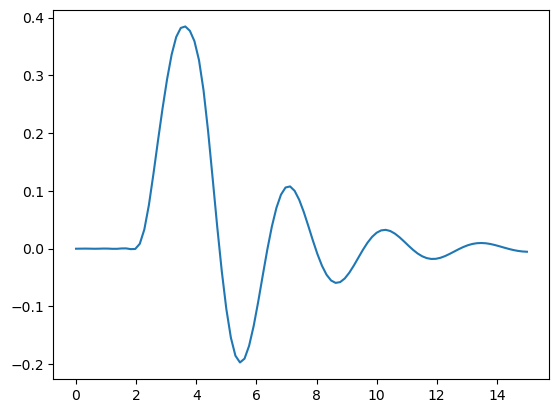

In [33]:
import matplotlib.pylab as plt
plt.plot(t_eval,solution_numeric_eval);